## Importar librerias

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [8]:
X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [9]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y
    }
)

In [12]:
df_center = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1],
    }
)

In [13]:
df_blobs

,x1,x2,y
0,0.830688,0.736589,1
1,-1.542282,-8.340386,3
2,8.591708,-1.865898,2
3,-0.073709,9.465995,0
4,8.735954,-2.758672,2
...,...,...,...
495,-1.597503,-8.326022,3
496,-0.759952,-8.796461,3
497,9.297419,-3.296450,2
498,7.401684,-3.589609,2


## Visualizacion de datos

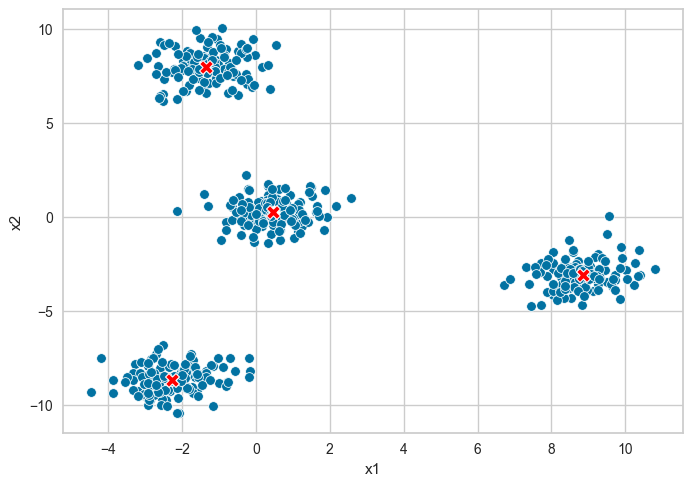

In [14]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_center, x='x1', y='x2', color='red', marker='X', s=100)
plt.show()

### Aplicando K-means

In [19]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1': k_means_centers[:, 0],
        'x2': k_means_centers[:, 1]
    }
)


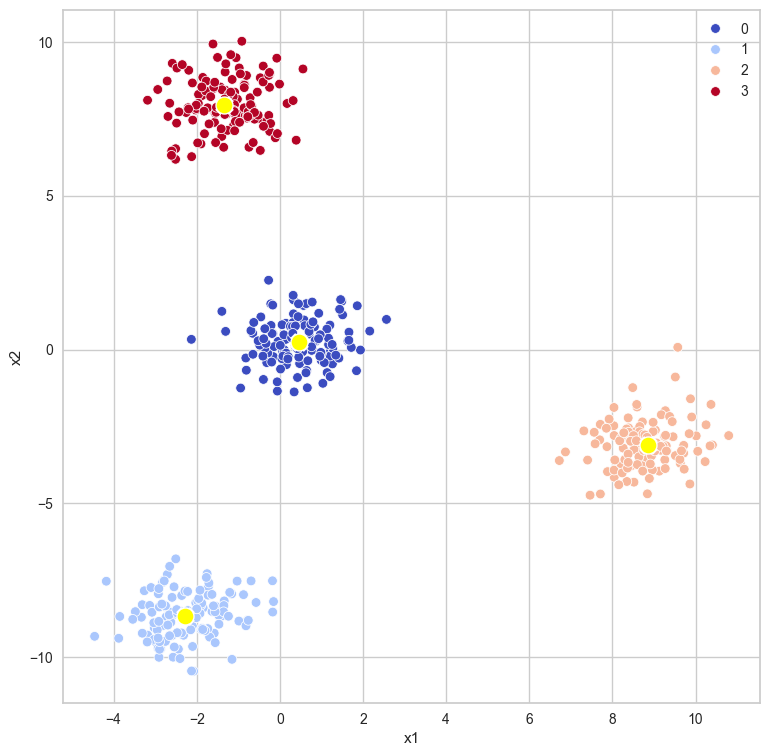

In [20]:
fig = plt.figure(figsize=(9, 9))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_center, x='x1', y='x2', color='red', marker='X', s=150)
sns.scatterplot(data=df_center, x='x1', y='x2', color='yellow', marker='o', s=150)
plt.show()